# **Inspect PL**

_by Felix Eickemeyer_

This notebook can be used to inspect the individual calibrated spectra.
Calibration and correction has to be done before.
__

In [18]:
import os
from thot import ThotProject

from FTE_analysis_libraries import General as gen
from FTE_analysis_libraries import PLQY as lqy
from FTE_analysis_libraries import Spectrum as spc

In [19]:
# Initializes Thot project
db = ThotProject( dev_root = 'PLQY_results' )

In [20]:
samples = db.find_assets( { 'type': 'calibrated PL spectrum' } )
for idx, sample in enumerate( samples ):
    print( f'{idx:2}: {sample.name}' )    

 0: 0_s1_calibrated PL spectrum.csv
 1: 1_s2_calibrated PL spectrum.csv
 2: 2_s3_calibrated PL spectrum.csv
 3: 3_s4_calibrated PL spectrum.csv
 4: 4_s5_calibrated PL spectrum.csv
 5: 5_s6_calibrated PL spectrum.csv


In [21]:
#Select samples and change order
do_this_step = False
if do_this_step:
    order = [ 0, 1, 2, 3, 4, 20, 21, 22, 23 ]  # project 1
    samples_new = [ samples[ order[ idx ] ] for idx in range( len( order ) ) ]
    for idx, sample in enumerate( samples_new ):
        print( f'{idx:2}: {sample.name}' )
    do_this_step = False
    
else:
    samples_new = samples

In [38]:
samples = samples_new
def load_spectrum( asset ):
    dtry = os.path.dirname( asset.file )
    FN = os.path.basename( asset.file )
    return spc.PEL_spectrum.load( dtry, FN = FN, take_quants_and_units_from_file = True )

sa = []
for idx, sample in enumerate( samples ):
    sa.append( load_spectrum( sample ) )
    print( f'{idx:2}: {sample.name}' )

 0: 0_s1_calibrated PL spectrum.csv
 1: 1_s2_calibrated PL spectrum.csv
 2: 2_s3_calibrated PL spectrum.csv
 3: 3_s4_calibrated PL spectrum.csv
 4: 4_s5_calibrated PL spectrum.csv
 5: 5_s6_calibrated PL spectrum.csv


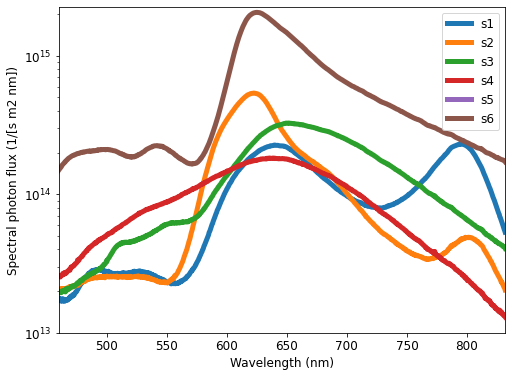

In [41]:
allPL = spc.PEL_spectra( sa )
#allPL.normalize()
allPL.names_to_label()

for idx in range( len( samples ) ):
    allPL.sa[ idx ].plotstyle = {
        'color': gen.colors[ idx ],
        'linewidth': 5,
        'linestyle': '-'
    }
    
    sm = samples[ idx ].metadata
    s_name = samples[ idx ].name.split( '_calibrated' )[ 0 ]
    PF = allPL.sa[ idx ].photonflux( start = 700, stop = 900 )
    
# allPL.sa[0].plotstyle = dict(color = gen.colors[0], linewidth = 5, linestyle = '-')
# allPL.sa[1].plotstyle = dict(color = gen.colors[0], linewidth = 5, linestyle = '-')
# allPL.sa[2].plotstyle = dict(color = gen.colors[0], linewidth = 5, linestyle = '-')
# allPL.sa[3].plotstyle = dict(color = gen.colors[0], linewidth = 5, linestyle = '-')
# allPL.sa[4].plotstyle = dict(color = gen.colors[0], linewidth = 5, linestyle = '-')
# allPL.sa[5].plotstyle = dict(color = gen.colors[1], linewidth = 5, linestyle = '-')
# allPL.sa[6].plotstyle = dict(color = gen.colors[1], linewidth = 5, linestyle = '-')
# allPL.sa[7].plotstyle = dict(color = gen.colors[1], linewidth = 5, linestyle = '-')
# allPL.sa[8].plotstyle = dict(color = gen.colors[1], linewidth = 5, linestyle = '-')
# allPL.sa[9].plotstyle = dict(color = gen.colors[1], linewidth = 5, linestyle = '--')
# allPL.sa[10].plotstyle = dict(color = gen.colors[2], linewidth = 5, linestyle = '-')
# allPL.sa[11].plotstyle = dict(color = gen.colors[2], linewidth = 5, linestyle = '-')
# allPL.sa[12].plotstyle = dict(color = gen.colors[2], linewidth = 5, linestyle = '-')
# allPL.sa[13].plotstyle = dict(color = gen.colors[2], linewidth = 5, linestyle = '-')
# allPL.sa[14].plotstyle = dict(color = gen.colors[2], linewidth = 5, linestyle = '-')

allPL.label([ 's1', 's2', 's3', 's4', 's5', 's6' ] )
all_graph = allPL.plot(
    yscale = 'log',
    bottom =1e13,
    left = 460,
    plotstyle = 'individual',
    figsize = ( 8, 6 ),
    return_fig = True,
    show_plot = False
)

lqy.add_graph( db, 'all_PL_spectra_log.png', all_graph )